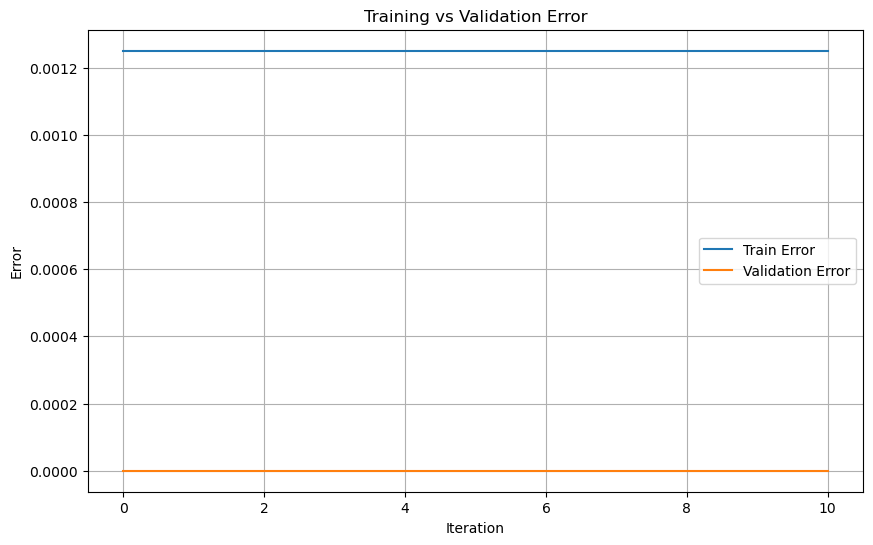

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('test.csv')

# Simulate a binary target column (change this if you know the actual target)
df['target'] = (df['ram'] > df['ram'].median()).astype(int)

# Prepare features and target
X = df.drop(columns=['id', 'target'])
y = df['target']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'learning_rate': 0.1,
    'max_depth': 4,
    'seed': 42
}

# Train the model
evals_result = {}
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dval, 'eval')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=False
)

# Plotting error curves
train_errors = evals_result['train']['error']
val_errors = evals_result['eval']['error']
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train Error')
plt.plot(val_errors, label='Validation Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Training vs Validation Error')
plt.legend()
plt.grid(True)
plt.show()
